In [12]:
#!pip install scikit-learn
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#!pip install wordcloud
#!pip install nltk

In [14]:
#!pip index versions tensorflow
#!pip index versions tensorflow
#!pip install tensorflow==2.16.2
#!pip install --upgrade tensorflow


In [16]:
#!pip install tensorflow==2.17.0

In [4]:
#!pip install --upgrade pip

## Importing Libraries

In [10]:
# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Import DataSet

In [18]:
df=pd.read_csv("train.txt",header=None,sep=';',names=['Comment','Emotion'],encoding='utf-8')

In [20]:
df.head()

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [22]:
# get all words length in comment
df['length']=[len(x) for x in df['Comment']]

In [24]:
df

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [26]:
df.shape

(16000, 3)

In [28]:
df.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [30]:
df.duplicated().sum()

1

In [32]:
df.drop_duplicates(inplace=True)

## EDA

In [35]:
df['Emotion'].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

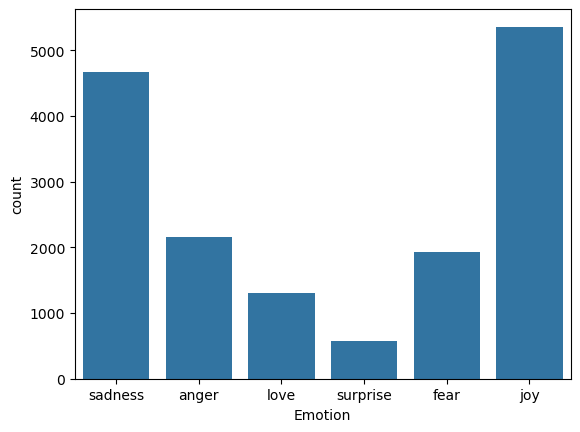

In [37]:
sns.countplot(x=df['Emotion'])
plt.show()

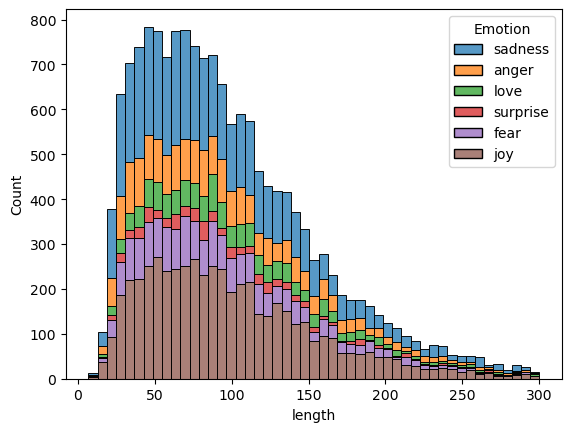

In [39]:
# data distribution
df2 = df.copy()
df2['length'] = [len(x) for x in df2['Comment']]

# Convert the 'length' column to a numpy array
length_values = df2['length'].values

# Use sns.histplot instead of sns.kdeplot for simplicity
sns.histplot(data=df2, x='length', hue='Emotion', multiple='stack')

plt.show()

In [41]:
#!pip install wordcloud matplotlib

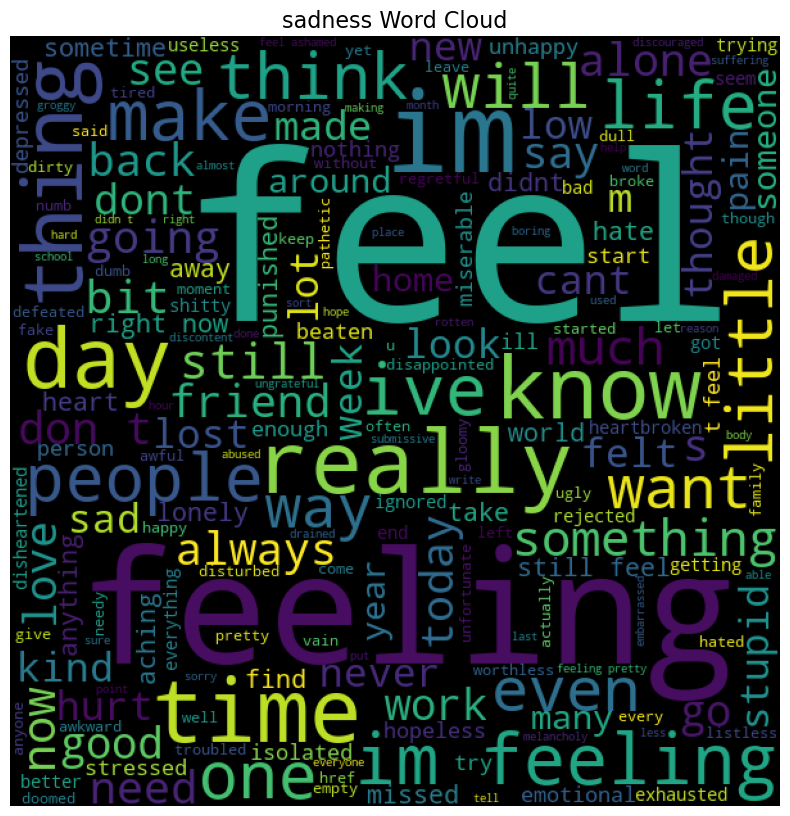

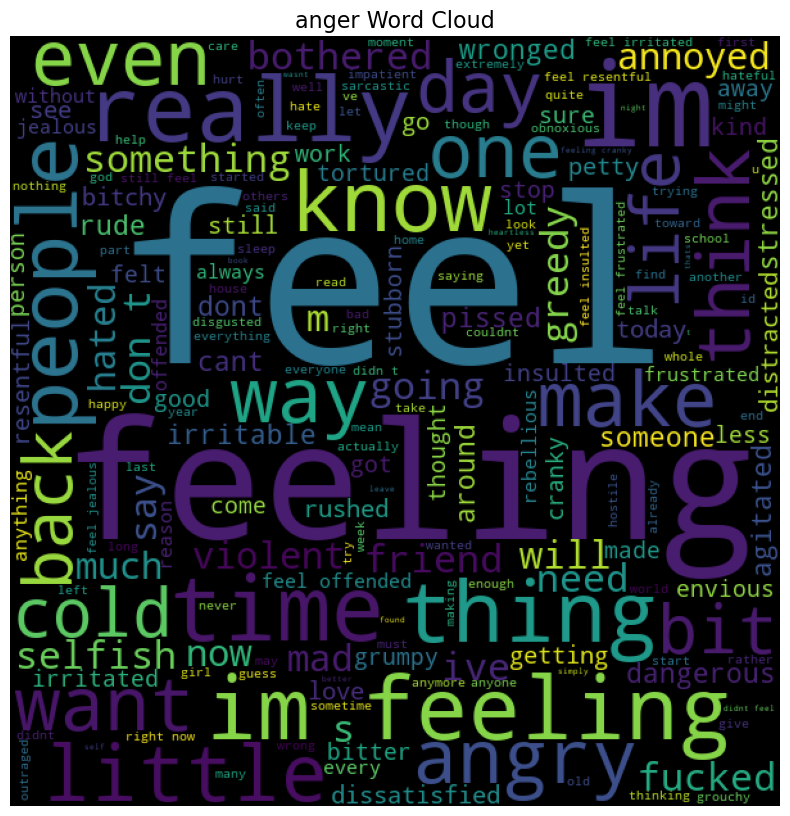

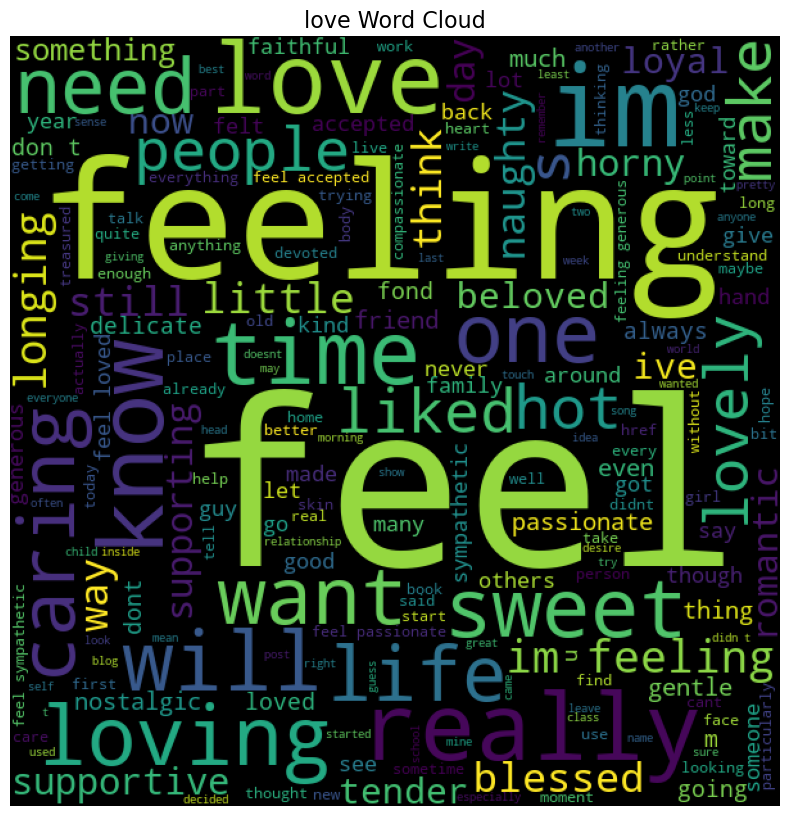

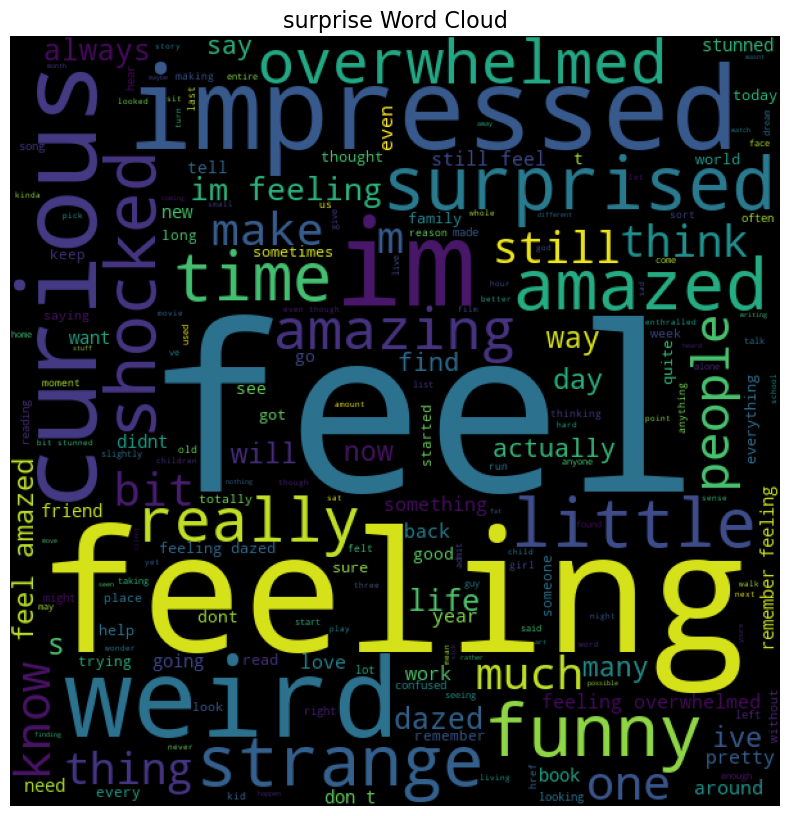

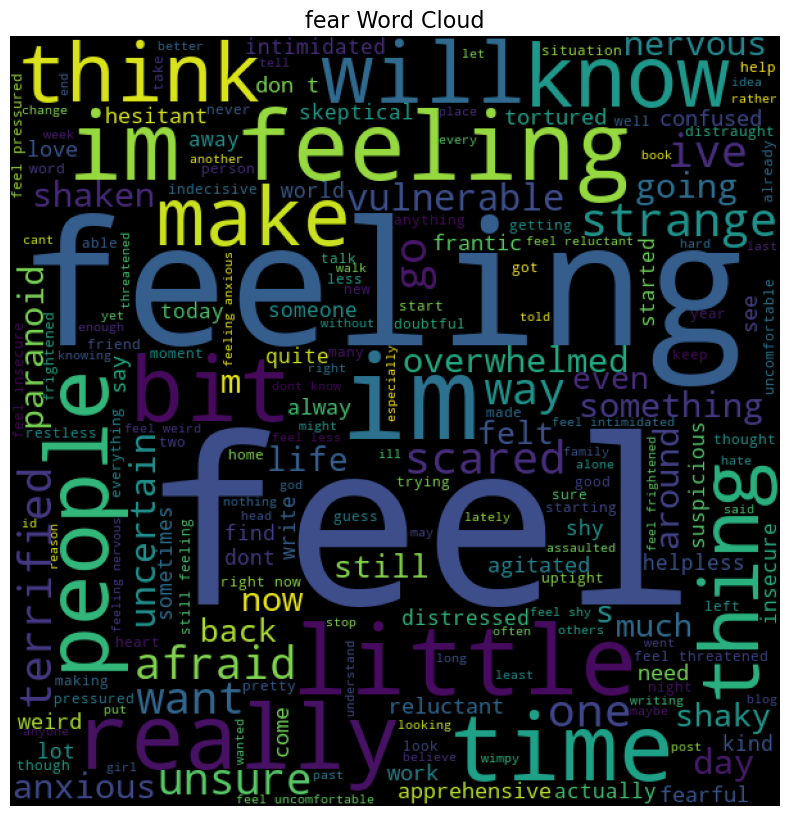

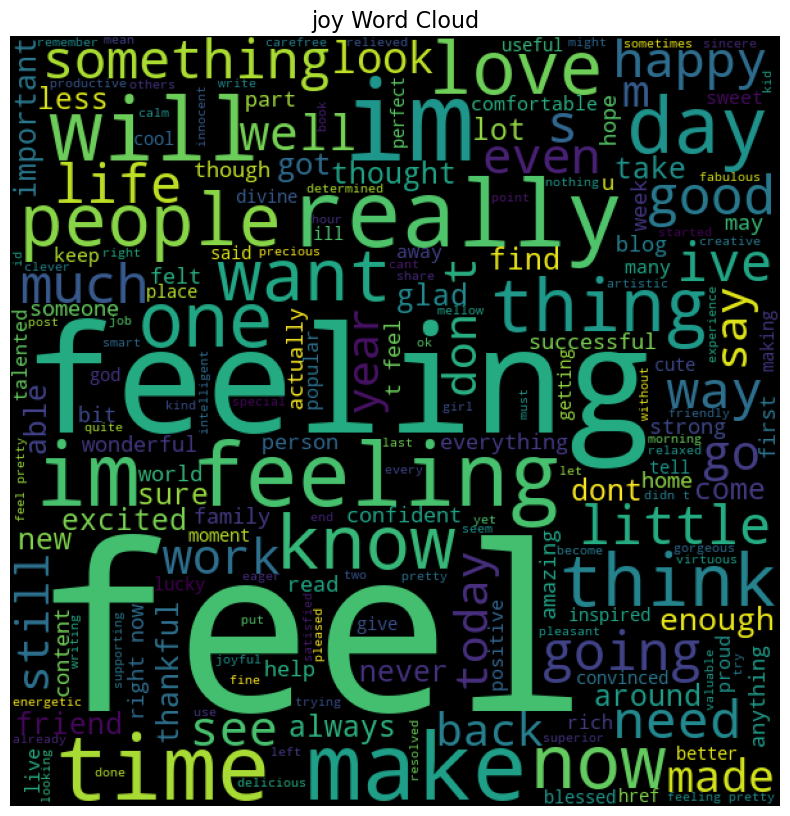

In [43]:
# Words cloud for each emotions
def words_cloud(wordcloud, emotion):
    plt.figure(figsize=(10, 10))
    plt.title(emotion+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
emotions_list = df['Emotion'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in df.loc[df['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)


## Data Preprocessing
## Encode Emotions

In [46]:
lb=LabelEncoder()
df['Emotion_Encoded']=lb.fit_transform(df['Emotion'])

In [48]:
df

,Comment,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


## Applying Machine Learning

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [53]:
df3=df.copy()

In [55]:
df3

,Comment,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [57]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd

In [59]:
# Data cleaning and preprocessing
# Download NLTK stopwords
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

df3['cleaned_comment'] = df3['Comment'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anish_u3hb3uz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [60]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df3['cleaned_comment'],df3['Emotion_Encoded'],test_size=0.2,random_state=42)

In [63]:
# Vectorization using TF-IDF
#tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [65]:
# Multi-class classification using different algorithms
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
}

for name, clf in classifiers.items():
    print(f"\n===== {name} =====")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"\nAccuracy using TF-IDF: {accuracy_tfidf}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_tfidf))


===== Multinomial Naive Bayes =====

Accuracy using TF-IDF: 0.6590625
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.88      0.23      0.37       375
           2       0.58      0.98      0.73      1027
           3       1.00      0.03      0.05       303
           4       0.72      0.91      0.80       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200


===== Logistic Regression =====

Accuracy using TF-IDF: 0.825
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       439
           1       0.85      0.72      0.78       375
           2       0.76      0.94      0.84      1027
           3       0.84      0.47      0.60       303
      

In [67]:
# selecting model
lg = LogisticRegression()
lg.fit(X_train_tfidf, y_train)
y_pred_lg = lg.predict(X_test_tfidf)
y_pred_lg

array([4, 2, 4, ..., 2, 2, 4])

In [69]:
def predict_emotion(input_text):
    # Clean the input text
    cleaned_text = clean_text(input_text)
    
    # Vectorize the cleaned text
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])
    
    # Predict the emotion
    predicted_label = lg.predict(input_vectorized)[0]
    
    # Convert the numerical label to emotion using LabelEncoder
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label = np.max(lg.predict(input_vectorized)[0])
    
    # Return the predicted emotion and label
    return predicted_emotion, label

# Example usage
sentences = [
    "i didnt feel humiliated",
    "i feel strong and good overall",
    "im grabbing a minute to post i feel greedy wrong",
    "He was speechles when he found out he was accepted to this new job",
    "This is outrageous, how can you talk like that?",
    "I feel like im all alone in this world",
    "He is really sweet and caring",
    "You made me very crazy",
    "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
    "i am feeling grouchy",
    "He hates you"
]

for sent in sentences:
    print(sent)
    predicted_emotion, label = predict_emotion(sent)  # Correctly call the function
    print("Predicted Emotion:", predicted_emotion)
    print("Predicted Label:", label)
    print("================================================================")


i didnt feel humiliated
Predicted Emotion: sadness
Predicted Label: 4
i feel strong and good overall
Predicted Emotion: joy
Predicted Label: 2
im grabbing a minute to post i feel greedy wrong
Predicted Emotion: anger
Predicted Label: 0
He was speechles when he found out he was accepted to this new job
Predicted Emotion: joy
Predicted Label: 2
This is outrageous, how can you talk like that?
Predicted Emotion: anger
Predicted Label: 0
I feel like im all alone in this world
Predicted Emotion: sadness
Predicted Label: 4
He is really sweet and caring
Predicted Emotion: love
Predicted Label: 3
You made me very crazy
Predicted Emotion: sadness
Predicted Label: 4
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Predicted Emotion: love
Predicted Label: 3
i am feeling grouchy
Predicted Emotion: anger
Predicted Label: 0
He hates you
Predicted Emotion: anger
Predicted Label: 0


In [71]:
# Save files
import pickle
pickle.dump(lg,open("logistic_regresion.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))

In [73]:
import sklearn
print(sklearn.__version__) #for using this version in pycharm

1.4.2


## Applying Deep learning Using LSTM
## Text Cleaning,Ecoding, and Padding

In [76]:
 max([len(w) for w in df['Comment']])

300

In [78]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [80]:
def clean_text(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()

    corpus = []
    for text in df2[column]:
        text = re.sub("[^a-zA-Z]",' ',text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(w) for w in text if w not in stopwords]
        text = " ".join(text)
        corpus.append(text)
        
    one_hot_word=[one_hot(input_text=word,n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
    return pad

x_train=clean_text(df,'Comment',vocab_size=11000, max_len=300)


In [81]:
x_train

array([[    0,     0,     0, ...,  5562,  3221, 10469],
       [    0,     0,     0, ...,  1718,    52,  3601],
       [    0,     0,     0, ...,  3221,  1019,  5609],
       ...,
       [    0,     0,     0, ...,  2758,  6041,   417],
       [    0,     0,     0, ...,  5426,  8607,  1617],
       [    0,     0,     0, ...,  3221, 10511,  8759]])

In [84]:
x_train.shape

(15999, 300)

In [86]:
lb = LabelEncoder()
df['Emotion'] = lb.fit_transform(df['Emotion'])

In [88]:
y_train=to_categorical(df['Emotion'])

In [90]:
y_train.shape

(15999, 6)

## Model Building and Training

In [93]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=11000, output_dim=150, input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)


C:\Users\anish_u3hb3uz\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 384ms/step - accuracy: 0.3074 - loss: 1.6273
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 118s 471ms/step - accuracy: 0.6696 - loss: 0.9146
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 120s 479ms/step - accuracy: 0.9028 - loss: 0.3085
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 124s 494ms/step - accuracy: 0.9378 - loss: 0.1925
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 127s 508ms/step - accuracy: 0.9464 - loss: 0.1564


## Predictive System

In [96]:
def pred(text):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]",' ',text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(w) for w in text if w not in stopwords]
    text = " ".join(text)
    corpus.append(text)
        
    one_hot_word=[one_hot(input_text=word,n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=300,padding='pre')
    return pad

sentences = [
    'I hate mangoes',
    'I feel strong and good overall',
    'He is really sweet and caring',
]
for sent in sentences:
    clean_sent = pred(sent)
    emotion = lb.inverse_transform(np.argmax(model.predict(clean_sent),axis=-1))[0]
    label = np.max(model.predict(clean_sent))
    print(emotion)
    print(label)
    print("=======================================")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
anger
0.84723794
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
joy
0.9968901
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
love
0.8968795


## Save the model and files

In [99]:
model.save('model.h5')

In [101]:
print(sklearn.__version__)

1.4.2
